# BANK MARKETING# 

The data used in this analysis is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to identify existing clients that have higher chance to subscribe for a term deposit, in order to know in which potential clients the bank should focus marketing efforts. The importance of this product is that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. 

Since it is a learning project,the following objectives have been define:

- Definition of relevant functions to carry out the study, which are currently available in libraries. The objective of this is to affirm the concepts acquired. Special emphasis will be placed on the definition of metric functions and sample split.


- Make a brief introduction of the different techniques used to classify data and apply them through the Scikit Learn library.

The report is divided into the following sections:


1. [Libraries, import the data and definition of functions to be used for plot](#Libraries_and_definition_of_functions_to_be_used)<br>
2. [First approach to the variables](#First_approach_to_the_variables)<br>

    I. [Descriptive Statics](#Descriptive_Statics) <br> 
    
    II. [y(Target Variable)](#y_Target_Variable) <br>
    
    III. **[Bank client data](#bank_client_data)**<br>
    A. [Age](#Age)<br>
    B. [Job](#Job)<br>
    C. [Marital](#Marital)<br>
    D. [Education](#Education)<br>
    E. [Default](#Default)<br>
    F. [Housing](#Housing)<br>
    G. [Loan](#Loan)<br>    
    
    IV. **[Related with the last contact of the current campaign](#Related)**<br>
    A. [Contact](#Contact)<br>
    B. [Month](#Month)<br>
    C. [Day of Week](#DOW)<br>
    D. [Duration](#Duration)<br>
    
    V. **[Other attributes](#Other_att)**<br>
    A. [Campaign](#Campaign)<br>
    B. [Pdays](#Pdays)<br>
    C. [Previous](#Previous)<br>
    D. [Poutcome](#Poutcome)<br>
    
    VI.**[Social and economic context attributes](#Social)**<br>
   
3. [Data Cleaning](#Data_Cleaning) <br>

4. [Metrics](#Metrics)<br>
    I. [Confusion Matrix](#CM)<br>
    II.[Accuracy](#ACC) <br>
    III. [Precision](#PR)<br>
    IV. [Recall](#REC)<br>
    V. [F1 Score](#F1)<br>
    VI. [Other Functions](#OT)<br>

5. [Models](#Models)<br>
    I. [KNN](#KNN) <br>
    II.[SVM](#SVM) <br>
    III. [LOGISTIC REGRESSION](#LR)<br>
    IV. [DECISION TREE](#DTC)<br>
    V. [RANDOM FOREST](#RF)<br>
    VI. [GRADIENT BOOSTING](#GB)<br>
    VII. [XGBOOST](#XGB)<br>
    VIII. [NAIVE BAYES](#NB)<br>
    IX. [SUMMARY](#SUM)<br>

6.  [Dealing with Imbalanced Data](#DWID)<br>
    I.[Finding the Best Classification Threshold](#FBCT)<br>
    II.[Incorporate Weights of the Classes](#IWC)<br>
    III.[Conclusion](#CONC)<br>
    



<a id="Libraries_and_definition_of_functions_to_be_used"></a> 
# **1. Libraries, import the data and definition of functions to be used for plot**

In order to start with the analysis, the first step to do is to import all the libraries, then import the data and define some functions that will be useful for the analysis.


In [ ]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#Load the data 
data = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv",sep=";")



The following functions were defined to generate to plot and make a first approach of the variables.

In [ ]:
#Plot functions for categorical variables

def categorical_var_plot(label,dataset,target_variable,text_size):
    """ This function is defined in order to make three different plots:
    - Pie: Shows the percentage of each category inside the variable.
    - Bar plot: Shows the percentage of clients that has a term deposit by category, also has a red line which shows the average rate of people which hire a term deposit.
    - Count Plot: Shows the percentage of each category inside the variable, differenciated by if the person has hire a term a deposit.
    
    Args:
    label: Category selected
    dataset: Dataset
    target_variable: target variable of the project
    text_size: set text size of the plot"""
    
    #Define colors
    colors_list= sns.color_palette("hls",12)
    #Set Text Size
    sns.set(font_scale=text_size)
    #Plot size
    fig = plt.figure(figsize=(50,20))
    
    plt.suptitle(t=label.title())
    
    
    # Subplot 1: Pie Plot
    a0= plt.subplot2grid((2,2),(0,0))
    plt.pie(dataset[label].value_counts(),
                       radius= 1,
                       autopct='%1.1f%%',# to label the wedges with their percentage 
                       startangle=30,    
                       shadow=True,
                       pctdistance=1.16,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                       colors=colors_list, # add custom colors
                       )
    plt.title("Distribution")
    plt.legend(labels=pd.DataFrame(data[label].value_counts()).index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
    
    #Subplot 2 : Bar Plot
    #group by target and label
    var_gby= data.groupby([label,target_variable]).size()
    var_size= len(data[label].unique())*2
    table=[]
    #iterate in order to find the percentage of clients that a has a term deposit
    for i in range(0,var_size,2):
        a =(var_gby[i+1]/(var_gby[i]+var_gby[i+1]))*100
        table.append(a)
    # Sort the names
    index_vab = np.sort(data[label].unique())

    table1= pd.DataFrame({"Names":index_vab,"Data": table})
    a1= plt.subplot2grid((2,2),(0,1))
    a1 = sns.barplot( x="Names", y="Data",data=table1,palette=colors_list)

    plt.axhline(11.3, color='r', linestyle='--')
    plt.title("Percentaje of clients that have a term deposit by category")
    plt.xlabel("Categories")
    plt.ylabel("Percentage(%)")
    #Add the percentage of each class
    for p in a1.patches:
        a1.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
 
    # Subplot 3: Count Plot
    a2 = plt.subplot2grid((2,2),(1,1))
    a2 = sns.countplot(x=label,data=dataset,palette = colors_list ,hue=target_variable, order =np.sort(data[label].value_counts().index))
    
    for p in a2.patches:
        a2.annotate('{:.1f}%'.format(100*p.get_height()/len(dataset[label])*1.), (p.get_x()+0.1, p.get_height()+10))
        
    plt.title ("Distribution dif by if the client has suscribed the term deposit")
    plt.ylabel('Number of samples')
    plt.xlabel('Categories')
    
 
   

    
    plt.show()
    
def categorical_var_plot2(label,dataset,target_variable,text_size):
    """ 
     This function is defined in order to make two different plots:
    - Pie: Shows the percentage of each category inside the variable.
    - Count Plot: Shows the percentage of each category inside the variable, differenciated by if the person has hire a term a deposit.
    
    Args:
    label: Category selected
    dataset: Dataset
    target_variable: target variable of the project
    text_size: text size of the plot"""
    colors_list= sns.color_palette("hls",12)
    sns.set(font_scale=text_size)
    fig = plt.figure(figsize=(30,15))
    plt.suptitle(t=label.title())

    # Subplot 1: Pie Plot
    a0= plt.subplot2grid((2,2),(0,0))
    plt.pie(dataset[label].value_counts(),
                       radius= 1,
                       autopct='%1.1f%%',# to label the wedges with their percentage 
                       startangle=30,    
                       shadow=True,
                       pctdistance=1.16,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                       colors=colors_list, # add custom colors
                       )
    plt.title("Distribution")
    plt.legend(labels=pd.DataFrame(data[label].value_counts()).index, loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
 
    # Subplot 2: Count Plot
    a2 = plt.subplot2grid((2,2),(0,1))
    a2 = sns.countplot(x=label,data=dataset,palette = colors_list ,hue=target_variable, order =np.sort(data[label].value_counts().index))
    for p in a2.patches:
        a2.annotate('{:.1f}%'.format(100*p.get_height()/len(dataset[label])*1.), (p.get_x()+0.1, p.get_height()+10))
        
    plt.title ("Distribution dif by if the client has suscribed the term deposit")
    plt.ylabel('Number of samples')
    plt.xlabel('Categories')
    
    plt.show()
    
def continuos_var_plot(label,dataset):
    colors_list = sns.color_palette("hls",12)
    fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (40,30))
    sns.distplot(dataset[label],hist=True,color="firebrick" ,ax =ax1)
    ax1.set_title("DISTRIBUTION")
    
    sns.boxplot(x = dataset[label], orient = 'h',ax=ax2,palette=colors_list,whis=True)
    ax2.set_xlabel(label)
    ax2.set_ylabel("Distribution")
    ax2.set_title("Distribution")
    plt.show()
    

<a id="First_approach_to_the_variables"></a>
# **2. First approach to the variables**
<a id= "Descriptive_Statics"></a>
    
    I. Descriptive Statics:
    
- There are ten categorical variables, ten numerical variables and the target variable which is categorical, since is a classification problem. 
- There are no missing values.  
    

In [ ]:

data.info()

data.describe(include="all")

<a id= "y_Target_Variable"></a>
II. y (Target Variable)

In the following graphic, it can be clearly seen that most of the clients (88,7%) have not suscribed a term deposit. This is an important fact, because since is an imbalanced dataset, metrics like accuracy can create a misconception of the analysis. For example, if we predict that all the clients are not going to suscribed a term deposit, we achived an accuracy of 88.7%, but this not concurs with our analysis objetive.

In [ ]:
#Pie plot of the target variable

colors_list = sns.color_palette("hls",12)

data.y.value_counts().plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.1f%%',# to label the wedges with their percentage 
                            startangle=30,    
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list, # add custom colors
                            explode = [0, 0.1]
                           
                            )
plt.legend(labels=("No","Yes"), loc='upper left')
plt.title("Target Variable:Has the client subscribed a term deposit? ")

#variable 
#y = pd.get_dummies(data.y)
#y =np.asarray(y.yes)



> <a id="bank_client_data"> </a>
**Bank Client Data**

> <a id="Age"> </a>
**A. Age**

Age (numeric)

The information and graphs made are not sufficient to conclude if age has an important impact in the target variable. However, the distribution analysis performed is important, in order to form groups since there are 78 different values of the age variable. This transformation will be shown, in the section Data Cleaning.



In [ ]:
#Plot the distribution of age
fig, (ax1, ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (40,20))


sns.distplot(data.age,hist=True,color="firebrick" ,ax =ax1)
ax1.set_title("AGE DISTRIBUTION")


sns.countplot(x="age",hue="y", data=data, ax=ax2, palette=colors_list)
ax2.set_title("Age distribution dif by if the client has subscribed a term deposit")

sns.boxplot(x = data.age, orient = 'h',ax=ax3,palette=colors_list,whis=True)
ax3.set_xlabel("Age")
ax3.set_title("Age Distribution")






In [ ]:
#Resume of information about the variable
data.age.describe()


In [ ]:

#Define IQR
IQR = data.age.quantile(0.75)-data.age.quantile(0.25)
# Find the outliers lower limit 
outliers = data.age.quantile(0.75)+1.5*IQR
# Find the distribution acummulated until outliers
quantile_outlier = stats.percentileofscore(data.age,outliers)
print("Ages above:",outliers, "are outliers and acumulate the",(100-quantile_outlier),"% of the distribution.")
print("Amount of different values of age in the sample:",len(data.age.unique()))

> <a id="Job"> </a>
**B. Job**

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')



Regarding the variable job, the conlusions that we can get are:

1. The main difference between the clients that have a term deposit is between de admin and blue collar, because it represents 25.3% and 22.5 % respectively, and the percentaje that has a term deposit is almost the double for the group admin.
2. The groups students and retired have rates of acquire a term deposit, 31.4% and 25.2% respectively, that are greater than the medium rate (11.3%). This is an important fact to analyze, but we are not in conditions that are  decisive characteristics because the available data for both classes is really small.

In [ ]:
categorical_var_plot("job",data,"y",1.4)

> <a id="Marital"> </a>
**C. Marital**

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)


In relation to the variable Marital, the percentage of clients that have a term deposit are similar, with a little major difference for single clients.

In [ ]:
categorical_var_plot("marital",data,"y",1.6)

> <a id="Education"> </a>
D. Education

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

In regard to the variable Education, it is important to note that the clients which have an University Degree,have a sligher trend to acquire a term deposit than the other categories.



In [ ]:
categorical_var_plot("education",data,"y",1.5)



 > <a id="Default"> </a>
 E. Default
 
  Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

  
  Regardind the variable default, the graphics don´t bring any relevant information. Also, there are only three cases that the person has a default credit, and none of them have a term deposit. 
  

In [ ]:
default_gby= data.groupby(["default","y"]).size()
default_gby

In [ ]:
categorical_var_plot2("default",data,"y",1.4) 

> <a id="Housing"> </a>
**F. Housing**

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Inside this variable, each category has a similar rate of hiring a term deposit.

In [ ]:
categorical_var_plot("housing",data,"y",1.5)

> <a id="Loan"> </a>
G. Loan

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
 
Inside this variable, each category has a similar rate of hiring a term deposit.
 

In [ ]:
categorical_var_plot("loan",data,"y",1.5)


> <a id="Related"> </a>
**IV. Related with the last contact of the current campaign**


> <a id="Contact"> </a>
A. Contact

Contact: contact communication type (categorical: 'cellular','telephone'

The following graphics show that if the contact has been done by cellphone, the probability of hiring a term deposit is higher.


In [ ]:
categorical_var_plot("contact",data,"y",1.5)

> <a id="Month"> </a>
B. Month

Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')

This variable shows different rates for each moth. However, since the months which have a higher rate of clientes that hire a term deposit were the months with less calls done, it can not be confirmed a seasonly on the data.

In [ ]:
categorical_var_plot("month",data,"y",1.4)

> <a id="DOW"> </a>
C. Day of Week

Dayofweek: last contact day of the week (categorical:'mon','tue','wed','thu','fri')

Inside this variable each category has a similar rate of hiring a term deposit.

In [ ]:
categorical_var_plot("day_of_week",data,"y",1.5)

> <a id="Duration"> </a>
D. Duration

Duration: last contact duration, in seconds (numeric). 

This attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.
Thus, this input would be discarded if the intention is to have a realistic predictive model.

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (40,30))

sns.distplot(data.duration,hist=True,color="firebrick" ,ax =ax1)
ax1.set_title("Duration DISTRIBUTION")


sns.boxplot(x = data.duration, orient = 'h',ax=ax2,palette=colors_list,whis=True)
ax2.set_xlabel("duration of the call")
ax2.set_ylabel("distribution")
ax2.set_title("Duration Distribution")



In [ ]:
#Drop duration from the dataset
data= data.drop(columns="duration")


> <a id="Other_att"> </a>
**Other attributes:**



> <a id="Campaign"> </a>
A. Campaign

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


In [ ]:
continuos_var_plot("campaign",data)

> <a id="Pdays"> </a>
B. Pdays

Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)

In [ ]:
pdays = data.groupby(["pdays","y"]).size()
print(pdays)


fig = plt.figure(figsize=(30,15))
data.pdays.plot(kind='hist', figsize=(10, 6)),

plt.title("pdays")
plt.show()

> <a id="Previous"> </a>
C. Previous


Previous: number of contacts performed before this campaign and for
this client (numeric)


In [ ]:
previous = data.groupby(["previous","y"]).size()
print(previous)


fig = plt.figure(figsize=(30,15))
data.previous.plot(kind='hist', figsize=(10, 6)),

plt.title("previous")
plt.show()

> <a id="Poutcome"> </a>
D. Poutcome

Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

In [ ]:
categorical_var_plot("poutcome",data,"y",1.5)

> <a id="Social"> </a>
VI. Social and economic context attributes

The following variables were included, which are not directly related with the clients: 

- Nr.employed: number of employees - quarterly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator
(numeric)
- Emp.var.rate: employment variation rate - quarterly indicator
(numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)




> <a id="Data_Cleaning"> </a>
# 3. Data Cleaning

As it was previously said, since there are 78 different values of the variable age, the quantiles and outliers were used as limits to form 5 groups. In the case of the first 3 groups, they will have a similar size, but it is not equal because the limit of the bin is included in the group, e.g. In the group 0, that has a superior limit of 32, we see that we have a lot of clients with this age (almost the maximum of the sample), so the group 0 will have a bigger size.

In [ ]:
bin_labels = [0,1, 2, 3, 4]
data["age"] = pd.qcut(data["age"], q=[0, .25, .5, .75,(quantile_outlier/100),1],labels=bin_labels).astype("float64")
data.age.value_counts()

 Then we need to convert the target variable into a dummy


In [ ]:
#variable 

data.y=pd.get_dummies(data.y,prefix="y",drop_first=True)

In the following code, we proceed to separate the variables in categorical and numerical. First of all, for the categorical variables we apply an ordinal encoding,so for each unique category value an integer value is assigned. Then we apply the function MinMaxScaler(), so the values are in the same range, because ML algorithms works better when features are relatively on a similar scale and close to Normal Distribution. For the numeric values, we only apply the MinMaxScaler(), for the reason explained before.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

scaler = MinMaxScaler()
enc=OrdinalEncoder()
categorical_cols = [cname for cname in data if
                    data[cname].dtype == "object"]
X = data[categorical_cols].values

X= enc.fit_transform(X)
X=scaler.fit_transform(X)

categorical=pd.DataFrame(X,columns=categorical_cols)
categorical.head()

numerical_cols = [cname for cname in data if 
                data[cname].dtype in ['int64', 'float64']]

X2=data[numerical_cols].values
X2=scaler.fit_transform(X2)
numerical=pd.DataFrame(X2,columns=numerical_cols)

y =data.y


data_1 = pd.concat([numerical,categorical,y],axis=1)
print(data_1.head())

dataset = np.asarray(data_1)



> <a id="Metrics"> </a>
# 4. Metrics

Functions to model and measure

> <a id="CM"> </a>
I. Confusion Matrix



Each confusion matrix row shows the Actual/True labels in the test set and the columns show the predicted labels by classifier.

In the specific case of a binary classifier, we can interpret these numbers as the count of true positives ($TP$), false positives($FP$), true negatives($TN$), and false negatives($FN$).

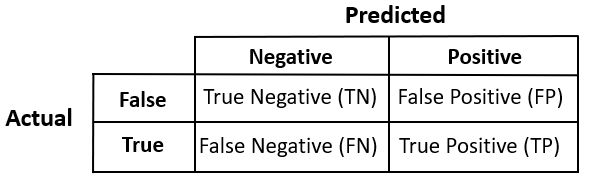

In [ ]:
def confusion_matrix(actual,prediction):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(actual)):
        if actual[i] == prediction[i] and actual[i] == 0:
            TN +=1
        elif actual[i] != prediction[i] and actual[i] == 1:
            FN +=1
        elif actual[i] != prediction[i] and actual[i] == 0:
            FP+=1
        else:
            TP+=1
    conf_matrix=([TN,FP,],[FN,TP])
    return conf_matrix

def confusion_matrix_mean(confusions_matrix,n_folds):
    TP=0
    FP=0
    FN=0
    TN=0
    
    for i in range(n_folds):
        TN += (confusions_matrix[i][0][0])/n_folds
        FP += (confusions_matrix[i][0][1])/n_folds
        FN += (confusions_matrix[i][1][0])/n_folds
        TP += (confusions_matrix[i][1][1])/n_folds
        
    confusion_matrix= ([int(TN),int(FP)],
                       [int(FN),int(TP)])
    return confusion_matrix

def plot_cm(cm):
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title("Confusion matrix")
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Clients which do not suscribed a term deposit, Correctly detected (True Negatives): ', cm[0][0])
  print('Clients which do not suscribed a term deposit, Incorrectly Detected (False Positives): ', cm[0][1])
  print('Cients which suscribed a term deposit, Incorrectly predicted (False Negatives): ', cm[1][0])
  print('Clients which suscribed a term deposit, Correctly Predicted(True Positives): ', cm[1][1])
  print('Total ', np.sum(cm[1]))

> <a id="ACC"> </a>
II. Accuracy

Accuracy ($ACC$) is the  number of correct predictions, divided by the hotal number of predictions. It is the fraction of predictions our model got right.

 $ACC = \frac {TP + TN}{TN+FN+TP+FP}$

In [ ]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

> <a id="PR"> </a>
III. Precision



Precision ($PR$) is a measure of the accuracy provided that a class label has been predicted.

$PR = \frac {TP}{TP+FP}$





In [ ]:
def Precision(actual,predicted):
    FP= 0
    TP= 0
    for i in range(len(actual)):
        if actual[i] != predicted[i] and actual[i] == 0:
            FP +=1
        elif actual[i] == predicted[i] and actual[i] == 1:
            TP +=1
        else:
            continue
    if (FP+TP) > 0:
        PREC = TP/(FP+TP)
    else: PREC = 0
    return PREC

> <a id="REC"> </a>
IV. Recall

And Recall($REC$) is the true positive rate.

$REC =\frac {TP}{TP+FN}$


In [ ]:
def Recall(actual,predicted):
    FN= 0
    TP= 0
    for i in range(len(actual)):
        if actual[i] != predicted[i] and actual[i] == 1:
            FN +=1
        elif actual[i] == predicted[i] and actual[i] == 1:
            TP +=1
        else:
            continue
    if (FN+TP) > 0:
        REC = TP/(FN+TP)
    else: REC = 0
    return REC
        
    
    

> <a id="F1"> </a>
V. F1 Score

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (which represents perfect precision and recall) and its worst at 0.

$ F1SCORE = 2 \times \frac {PR\times REC}{PR+REC}$

In [ ]:
def F1_SCORE (PR,REC):
    f1= 2*(PR*REC)/(PR+REC)
    return f1

> <a id="OT"> </a>
VI.Other functions

The following function was defined in order to split the data and run the models.


In [ ]:
#libraries
import random
from random import seed
from random import randrange
from csv import reader
from sklearn.metrics import precision_recall_curve


 
def train_test_split(dataset, split):
    """ This function is defined in order to  split the data into train and test sets.
    - dataset: the entire dataset, included the target variable in the last column
    - split: value between 0 and 1, which defines the percentage of sample that will be used to train the model later """
    
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    test=np.asarray(dataset_copy)
    train=np.asarray(train)
    y_train= np.ravel(train[:,[-1]])
    X_train = train[:, :-1]
    y_test =np.ravel(test [:,[-1]])
    X_test = test[:, :-1]
    return X_train,X_test,y_train,y_test

#function to split the data into 4 randomly sets
def cross_validation_split(dataset,n_folds):
    """ This function is defined in order to split the data into n randomly sets
    - dataset:the entire dataset, included the target variable in the last column
    - n_folds: amount of sets in which we want to split the sample"""
    data_split=list()
    data_to_split= list(dataset)
    fold_size = int(len(dataset))/n_folds
    for i in range(n_folds):
        fold=list()
        while len(fold) < fold_size:
            index= randrange(len(data_to_split))
            fold.append(data_to_split.pop(index))
        data_split.append(fold)
    return data_split


def evaluate_algorithm(dataset, algorithm, n_folds):
    """ This function is defined in order to run the selected model through cross validation and calculate the different metrics defined for each split of the data selected. Then, the function returns the average metrics.
     - dataset:the entire dataset, included the target variable in the last column
     - algorithm: the model that we want to apply to the train sample
     - n_folds: amount of sets in which we want to split the sample """
    # Split the dat
    folds = cross_validation_split(dataset,n_folds)
    scores= []
    conf=[]
    recall=[]
    precision=[]
    #conf.clear()
    
    for i in range(n_folds):
        #Prepare the data
        fold = folds[i]
        train = list(folds)
        test = train.pop(i)
        train = sum(train, [])
        test=np.asarray(test)
        train=np.asarray(train)
        y_train= np.ravel(train[:,[-1]])
        X_train = train[:, :-1]
        y_test =np.ravel(test [:,[-1]])
        X_test = test[:, :-1]
        #Define the model
        model =  algorithm
        #Fit the model
        model.fit(X_train, y_train)
        #Predict the model 
        model_pred = model.predict(X_test)
        #Calculate Accuracy
        accuracy = accuracy_metric(y_test,model_pred)
        scores.append(accuracy)
        #Confusion Matrix
        cm_results = confusion_matrix(y_test,model_pred)
        conf.append(cm_results)
        #Precision 
        pr = Precision(y_test,model_pred)
        precision.append(pr)
        #Recall
        rec = Recall(y_test,model_pred)
        recall.append(rec)
        #Precision Recall curve
        # predict probabilities
        probs = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        probs = probs[:,1]
        graph_precision, graph_recall,thres = precision_recall_curve(y_test, probs)
        
    acc_mean = np.mean(scores) 
    cm_mean= confusion_matrix_mean(conf,n_folds)
    recall_mean=np.mean(recall)
    precision_mean=np.mean(precision)
    f1 = F1_SCORE(precision_mean,recall_mean)
    
    
    return acc_mean,cm_mean,recall_mean,precision_mean,f1,graph_precision, graph_recall




> <a id="Model"> </a>

# 5. Models

In order to carry out a good analysis, the metric that we are going to choose is crucial. Our main objective in this project is to find the clients most likely to subcribe a term deposit, in order to carry out specific marketing campaigns efficiently, Since that, we are going to focus on the f1 score to evaluate the models. As it was defined as the harmonic mean of Precision and Recall, it penalizes the extreme values. So, it is a good measure to reduce the incorrectly classified cases, in order to achieve a balance between false negatives and false positives.



In [ ]:
#Set Seed
random.seed(40)
random_state = 100
np.random.state = random_state

> <a id="KNN"> </a>
I. KNN

The k-nearest-neighbors algorithm is a classification algorithm that takes a bunch of labelled points
and uses them to learn how to label other points.
This algorithm classifies cases based on their similarity to other cases. In k-nearest neighbors, data points that are near each other are said to be “neighbors”.
K-nearest neighbors is based on this paradigm: “Similar cases with the same class labels are near each other[.

In the following lines we run the model for different k groups of neighbors, in order to determine which value its more suitable for this data,


In [ ]:

from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(np.asarray(dataset), 0.75)
scores_knn=[]
scores_f1=[]
k=[]
for i in range(1,30,2):
    neigh = KNeighborsClassifier(n_neighbors = i)
    neigh.fit(X_train, y_train)
    model_pred = neigh.predict(X_test)
    accuracy = accuracy_metric(y_test,model_pred)
    scores_knn.append(accuracy/100)
    recall = Recall(y_test,model_pred)
    precision = Precision(y_test,model_pred)
    f1= F1_SCORE(precision,recall)
    k.append(i)
    scores_f1.append(f1)
    print("K=",i,"F1_SCORE:",f1)
    
plt.plot(k, scores_knn)
plt.plot(k,scores_f1)
plt.xlabel('K')
plt.ylabel("F1 Score")
plt.show()

As we can see in the graphic above, when the value of K increase, the f-score increase until K=9 and then strat to fall. Therefore, we choose a value of K= 9.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=9)
KNN_acc, KNN_cm, KNN_rec,KNN_pr,KNN_f1,KNN_graph_precision, KNN_graph_recall = evaluate_algorithm(np.asarray(dataset), neigh, n_folds=4)
KNN_acc, KNN_cm, KNN_rec,
print("F1 Score:",KNN_f1,"\n","Confusion Matrix:",KNN_cm,"\n","Accuracy:",KNN_acc)

> <a id="SVM"> </a>
II. SVM

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separated. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there is no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

Since SVM takes a lot of time for training with large datasets, we are not going to apply cross validation.

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

svm_rbf = svm.SVC(kernel='rbf',probability=True)
svm_lin = svm.SVC(kernel='linear',probability=True)
svm_poly = svm.SVC(kernel='poly',degree=3,probability=True)
kernels = [svm_rbf,svm_lin,svm_poly]

SVM_pr=[]
SVM_rec=[]
SVM_f1_score=[]
SVM_graph_precision=[]
SVM_graph_recall = []
SVM_acc=[]

for model in kernels:
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    model_pr = Precision(y_test,model_pred)
    SVM_pr.append(model_pr)
    model_rec = Recall(y_test,model_pred)
    SVM_rec.append(model_rec)
    model_f1_score = F1_SCORE(model_rec,model_pr)
    SVM_f1_score.append(model_f1_score)
    model_acc = accuracy_metric(y_test,model_pred)
    SVM_acc.append(model_acc)
    model_proba = model.predict_proba(X_test)
    model_proba=model_proba[:,1]
    model_graph_precision, model_graph_recall,model_thres = precision_recall_curve(y_test, model_proba)
    SVM_graph_precision.append(model_graph_precision)
    SVM_graph_recall.append(model_graph_recall)
    
    print(model,"Precision ",model_pr,"Recall ",model_rec,"F1 Score:",model_f1_score,"Accuracy:",model_acc)


> <a id="LR"> </a>
III. Logistic Regression

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or logistic function , also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability.
The objective of __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

LR_acc, LR_cm,LR_rec,LR_pr,LR_f1,LR_graph_precision, LR_graph_recall = evaluate_algorithm(dataset, lr, 4)

print("F1 Score:",LR_f1,"\n","Confusion Matrix:",LR_cm,"\n","Accuracy:",LR_acc)



> <a id="DTC"> </a>
IV. DECISION TREE

A decision tree is a decision support tool that is built using recursive partitioning to classify the data.
The algorithm chooses the most predictive feature to split the data on. The objetive is to determine “which attribute is the best, or more predictive, to split data based on the feature.
The functions to measure the quality of a split are: “gini” for the Gini impurity and “entropy” for the information gain.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for c in ["gini","entropy"]:
    DTC = DecisionTreeClassifier(criterion = c)
    DTC.fit(X_train, y_train)
    model_pred = DTC.predict(X_test)
    accuracy = accuracy_metric(y_test,model_pred)
    DTC_recall = Recall(y_test,model_pred)
    DTC_precision = Precision(y_test,model_pred)
    DTC_f1_score=F1_SCORE(DTC_precision,DTC_recall)
    print("Criterion:",c," F1 Score:",DTC_f1_score,"Accuracy:",accuracy)


In [ ]:
DTC = DecisionTreeClassifier(criterion = "entropy")


DTC_acc, DTC_cm, DTC_rec,DTC_pr,DTC_f1,DTC_graph_precision, DTC_graph_recall = evaluate_algorithm(dataset, DTC, 4)
print("F1 Score:",DTC_f1,"\n","Confusion Matrix:",DTC_cm,"\n","Accuracy:",DTC_acc)

> <a id="RF"> </a>
V. RANDOM FOREST

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Cross-validation is not necessary when using random forest, because multiple bagging in process of training random forest prevents over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_acc=[]
for n in range (100,600,100):
    RFC = RandomForestClassifier(n_estimators = n)#criterion = entopy,gini
    RFC.fit(X_train, y_train)
    rfc_pred = RFC.predict(X_test)
    accuracy = accuracy_metric(y_test,rfc_pred)
    RFC_precision=Precision(y_test,rfc_pred)
    RFC_recall=Recall(y_test,rfc_pred)
    RFC_f1=F1_SCORE(RFC_precision,RFC_recall)
    print("n_estimators:",n,"F1 Score:",RFC_f1,"Accuracy:",accuracy)

In [ ]:
RFC = RandomForestClassifier(n_estimators = 500)#criterion = entopy,gin
RFC.fit(X_train, y_train)
rfc_pred = RFC.predict(X_test)
RFC_acc = accuracy_metric(y_test,rfc_pred)
RFC_pr=Precision(y_test,rfc_pred)
RFC_rec=Recall(y_test,rfc_pred)
RFC_cm= confusion_matrix(y_test,rfc_pred)
RFC_f1=F1_SCORE(RFC_precision,RFC_recall)
#Precision Recall curve
# predict probabilities
probs = RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:,1]
RFC_graph_precision, RFC_graph_recall,RFC_thres = precision_recall_curve(y_test, probs)
    

> <a id="GB"> </a>
VI. GRADIENT BOOSTING

Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model.
Gradient Boosting for classification.

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()

GBC_acc, GBC_cm,GBC_rec,GBC_pr,GBC_f1,GBC_graph_precision, GBC_graph_recall= evaluate_algorithm(dataset, GBC, 4)

print("F1 Score:",GBC_f1,"\n","Confusion Matrix:",GBC_cm,"\n","Accuracy:",GBC_acc)



> <a id="XGB"> </a>
VII. XGBOOST

XGBoost

XGBoost is a specific implementation of the Gradient Boosting method which uses more accurate approximations to find the best tree model. While regular gradient boosting uses the loss function of our base model (e.g. decision tree) as a proxy for minimizing the error of the overall model, XGBoost uses the 2nd order derivative as an approximation. Also, it use an advanced regularization (L1 & L2), which improves model generalization.

In [ ]:
from xgboost import XGBClassifier

XGBC = XGBClassifier()

XGBC_acc, XGBC_cm, XGBC_rec,XGBC_pr,XGBC_f1, XGBC_graph_precision, XGBC_graph_recall= evaluate_algorithm(dataset, XGBC, 4)

print("F1 Score:",XGBC_f1,"\n","Confusion Matrix:",XGBC_cm,"\n","Accuracy:",XGBC_acc)


> <a id="NB"> </a>
VIII. NAIVE BAYES

Naive Bayes is essentially a technique for assigning classifiers to a finite set. However, there is no single algorithm for training these classifiers, so Naive Bayes assumes that the value of a specific feature is independent from the value of any other feature, given the class variable. 

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB_acc, GNB_cm , GNB_rec,GNB_pr,GNB_f1,GNB_graph_precision, GNB_graph_recall = evaluate_algorithm(dataset, GNB, 4)

print("F1 Score:",GNB_f1,"\n","Confusion Matrix:",GNB_cm,"\n","Accuracy:",GNB_acc)

> <a id="SUM"> </a>
IX. SUMMARY

In [ ]:
models_acc =(LR_acc,KNN_acc,SVM_acc[2],
DTC_acc,RFC_acc,GBC_acc,XGBC_acc,GNB_acc)
models_cm = [LR_cm,KNN_cm,#SVM_cm,
             DTC_cm,RFC_cm,GBC_cm,XGBC_cm,GNB_cm]
PR=[LR_pr,KNN_pr,SVM_pr[2],
             DTC_pr,RFC_pr,GBC_pr,XGBC_pr,GNB_pr]
REC=[LR_rec,KNN_rec,SVM_rec[2],
             DTC_rec,RFC_rec,GBC_rec,XGBC_rec,GNB_rec]
F1=[LR_f1,KNN_f1,SVM_f1_score[2],
             DTC_f1,RFC_f1,GBC_f1,XGBC_f1,GNB_f1]

    

In [ ]:
Summary = pd.DataFrame(columns=["Logistic Regression","KNN","SVM",
                                "DecisionTree","Random Forest",
                                "Gradient Boosting","XGBoost","Gaussian Naive Bayes"],data=[F1,PR,REC,models_acc], index=(["F1","PR","REC","Accuracy"])).transpose()
Summary.sort_values(by=["F1"],ascending=False,inplace=True)
Summary

As we can see in the table above, the model that has a higher f1-score is Naives Bayes (0.405), with a recall of 0.5 wichs means that half of the clients which suscribed a term where classified correctly. On the other hand, the precision value is 0.33, which means that for all the clients predicted as positive, just one third of them have actually sucribed a term deposit. The second model with higher f1-score is Random Forest. This model shows the opposite behavior to Naive Bayes, since just above a half of the clients predicted as positive actually are, and the 30% of the clients that have sucribed a term deposit where classified correctly. 
These numbers are not sufficient to conclude a great analysis and must be improved. 



><a id="DWID"> </a>
6. Dealing with Imbalanced Data

In order to deal with the imbalanced data, we are going to use two techniques:

><a id="FBCT"> </a>
I.Finding the Best Classification Threshold 

As for some models predicted previously, we can predict the probability of each client to suscribed a term deposit, it is important to note that the classifier.predict() function of scikit learn has a threshold of 0.5 by default for classification. A value above that threshold indicates "suscribed"; a value below indicates "not suscribed".
In order to be able to analyze if through the modification of the threshold,the results can be improved, we define the precision-recall curve(PCR). The same shows the relationship between precision and recall for every possible threshold. The PRC is a graph with: 

• The x-axis showing recall.

• The y-axis showing precision

Thus every point on the PRC represents a chosen cut-off even though you cannot see this cut-off. What you can see is the precision and the recall that you will get when you choose this cut-off. 





In [ ]:
plt.figure(figsize=(30,15))
plt.plot(KNN_graph_recall, KNN_graph_precision, marker='.', label='KNN')
plt.plot(LR_graph_recall, LR_graph_precision, marker='.', label='Logistic Regression')
plt.plot(SVM_graph_precision[2], SVM_graph_recall[2], marker='.', label='SVM')
plt.plot(DTC_graph_recall, DTC_graph_precision, marker='.', label='DTC')
plt.plot(RFC_graph_recall, RFC_graph_precision, marker='.', label='RFC')
plt.plot(GBC_graph_recall, GBC_graph_precision, marker='.', label='GBC')
plt.plot(XGBC_graph_recall, XGBC_graph_precision, marker='.', label='XGBC')
plt.plot(GNB_graph_recall, GNB_graph_precision, marker='.', label='GNB')
plt.title("Precision-Recall Curve")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

The graphic above shows that when the threshold decrease, the True Positive rate increase, but of course, at the cost of some more False Positives. For some cases, as the KNN curve, each graphic consists of two points effectively (since KNN predicts binary values) so this curve is not very useful or meaningful. However, for other cases like, GBC, XGBC, Logarithmic Regression and SVM, they show a remarkable improvement in the F1 Score. In the next lines we are going to define a function in order to find the thresold that maximizes F1 Score for each one.

In [ ]:
random_state = 40
np.random.state = random_state

In [ ]:
from numpy import argmax

def evaluate_diff_threshold(algorithm,dataset,train_size):
    """
    This function is defined in order to calculate the threshold which maximizes the f-score 
    algorithm:the model that we want to apply to the train sample
    dataset:the entire dataset, included the target variable in the last column
    train_size: value between 0 and 1, which defines the percentage of sample, that will be used to train the model later
    """
    X_train,X_test,y_train,y_test =train_test_split(np.asarray(dataset), train_size)
    model=algorithm
    model.fit(X_train, y_train)
    model_probs = model.predict_proba(X_test)
    model_probs = model_probs[:,1]
    model_precision, model_recall,model_thres = precision_recall_curve(y_test, model_probs)
    model_fscore = F1_SCORE(model_precision,model_recall)
    # locate the index of the largest f score
    ix = argmax(model_fscore)
    p=model_thres[ix]
    #Precision
    model_pr = Precision(y_test,model_probs>p)
    #Recall
    model_rec = Recall(y_test,model_probs>p)
    model_f1_score= F1_SCORE(model_pr,model_rec)
    #Confusion Matrix
    model_cm=confusion_matrix(y_test,model_probs>p)
    print(" Best Threshold:",model_thres[ix],"\n","F-Score=:",model_f1_score,"\n","Recall:",model_rec,"\n","Precision:",model_pr) 

    plot_cm(model_cm)
    
    return model_pr,model_rec,model_f1_score,model_cm, model_precision, model_recall, p

    

In [ ]:
GBC = GradientBoostingClassifier()
GBC_pr,GBC_rec,GBC_f1_score,GBC_cm,GBC_curve_pr,GBC_curve_rec,p =  evaluate_diff_threshold(GBC,dataset,0.75)

In [ ]:
XGBC = XGBClassifier()
XGBC_pr,XGBC_rec,XGBC_f1_score,XGBC_cm,XGBC_curve_pr,XGBC_curve_rec,q =  evaluate_diff_threshold(XGBC,dataset,0.75)


><a id="IWC"> </a>
II. Incorporate Weights of the Classes.


Additionally to find the best threshold, we are going to incorporate the weights of the classes  into the cost function Intuitively, we want to give higher weight to minority class and lower weight to majority class that at the end result is a classifier which can learn equally from all classes. Another technique used for this is Resampling to get more balanced data, that is out of the scope of our analysis.




In [ ]:
from sklearn.svm import SVC
SVC = SVC(kernel='poly',degree=3,probability=True,class_weight="balanced")
SVC_pr,SVC_rec,SVC_f1_score,SVC_cm,SVC_curve_pr,SVC_curve_rec,r =  evaluate_diff_threshold(SVC,dataset,0.75)

In [ ]:
LR = LogisticRegression(class_weight="balanced")
LR_pr,LR_rec,LR_f1_score,LR_cm,LR_curve_pr,LR_curve_rec,s =  evaluate_diff_threshold(LR,dataset,0.75)

In [ ]:
import matplotlib.patches as patches
    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,15))
 
plt.suptitle("Precision-Recall Curve")



ax1.figsize=(30,15)
ax1.plot(GBC_curve_rec, GBC_curve_pr, marker='.',label='GBC',linewidth=1,zorder=1),
ax1.plot(XGBC_curve_rec, XGBC_curve_pr, marker=".", label='XGBC',linewidth=1,zorder=1),
ax1.plot(LR_curve_rec, LR_curve_pr, marker=".", label='LR',linewidth=1,zorder=1),
ax1.plot(SVC_curve_rec,SVC_curve_pr, marker=".", label='SVM',linewidth=1,zorder=1)
ax1.add_patch(patches.Rectangle((0.4, 0.4),0.2,0.2,edgecolor = 'blue',facecolor = 'lightgray',
        fill=True
     ) )
ax1.arrow(0.65,0.5,0.3,0,width=0.01)

# axis labels
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
# show the legend
ax1.legend()


ax2.set_facecolor("lightgray")
ax2.scatter(GBC_rec, GBC_pr, marker='X',s=100, color='black', label='Best',zorder=2),
ax2.plot(GBC_curve_rec, GBC_curve_pr, marker='.',label='GBC',linewidth=1,zorder=1),
ax2.scatter(XGBC_rec, XGBC_pr, marker='X',s=100, color='black',zorder=2),
ax2.plot(XGBC_curve_rec, XGBC_curve_pr, marker=".", label='XGBC',linewidth=1,zorder=1),
ax2.scatter(LR_rec, LR_pr, marker='X',s=100, color='black',zorder=2),
ax2.plot(LR_curve_rec, LR_curve_pr, marker=".", label='LR',linewidth=1,zorder=1),
ax2.scatter(SVC_rec, SVC_pr, marker='X',s=100, color='black',zorder=2),
ax2.plot(SVC_curve_rec,SVC_curve_pr, marker=".", label='SVM',linewidth=1,zorder=1)
ax2.set_xlim(0.4,0.6)
ax2.set_ylim(0.4,0.6)

# axis labels
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
# show the legend
ax2.legend()




><a id="CONC"> </a>
III. Conclusion

1. After the analysis I carry out, it can be concluded that the best model that predicts if the client will hire a term deposit is grandient boosting, since it has a  F-Score of 0.514, with a recall of 0.577, wichs means that the 57.7% of the clients which suscribed a term where classified correctly. On the other hand, the precision value is 0.463, which means that for all the clients predicted as positive, 46.3% of them have actually sucribed a term deposit. This means that nearly one of two clients, for whom the marketing campaign will be focused might hire a term deposit. This implies a remarkable improvement because in this analysis we can also improve the true positive rate.
2. The other models improved(XGBC,Logarithmic Regression and SVM),also return similar results with a better performance than the one achived with the first analysis.
 
